In [1]:
import pandas as pd
df=pd.read_pickle('detection_results.pkl')

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud



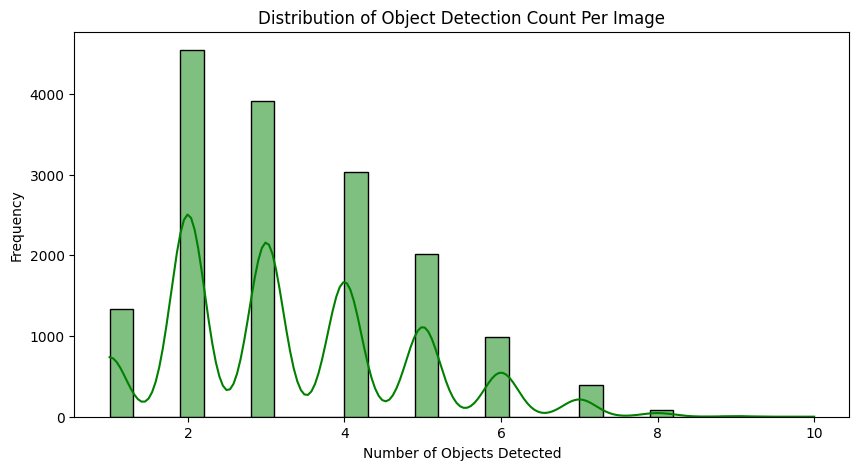

In [19]:
def plot_object_detection_count_per_image(df):
    object_counts = []
    
    for detected_objects in df['Detected Objects']:
        objects = detected_objects
        object_counts.append(len(objects))
    
    plt.figure(figsize=(10, 5))
    sns.histplot(object_counts, bins=30, kde=True, color='green')
    plt.title('Distribution of Object Detection Count Per Image')
    plt.xlabel('Number of Objects Detected')
    plt.ylabel('Frequency')
    plt.show()
plot_object_detection_count_per_image(df)

/tmp/ipykernel_270613/1322476806.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=objects, palette="viridis")


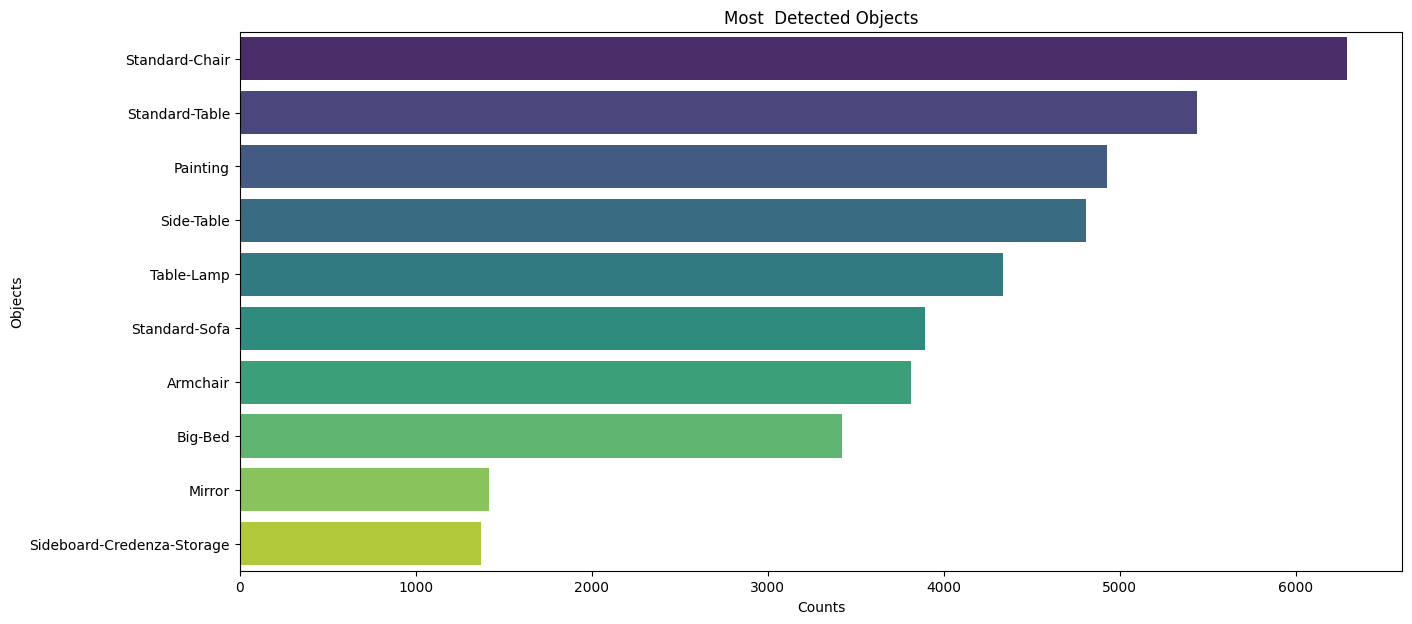

In [5]:

def plot_most_common_objects(df):
    object_counts = Counter()
    for detected_objects in df['Detected Objects']:
        object_counts.update(detected_objects)
    
    most_common = object_counts.most_common(10)
    objects, counts = zip(*most_common)
    plt.figure(figsize=(15, 7))
    sns.barplot(x=counts, y=objects, palette="viridis")
    plt.title('Most  Detected Objects')
    plt.xlabel('Counts')
    plt.ylabel('Objects')
    plt.show()
plot_most_common_objects(df)

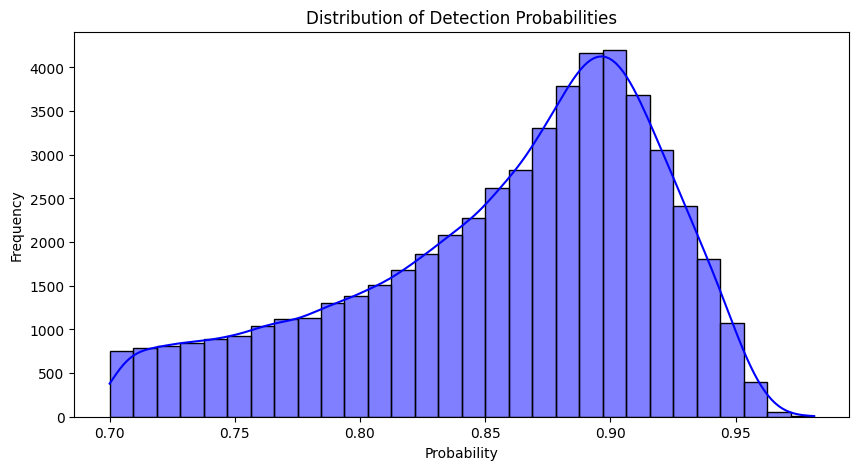

In [6]:
def plot_detection_probabilities(df):
    probabilities = []
    for detected_objects in df['Detected Objects']:
        objects = detected_objects
        probabilities.extend(objects.values())
    
    plt.figure(figsize=(10, 5))
    sns.histplot(probabilities, bins=30, kde=True, color='blue')
    plt.title('Distribution of Detection Probabilities')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    plt.show()

plot_detection_probabilities(df)

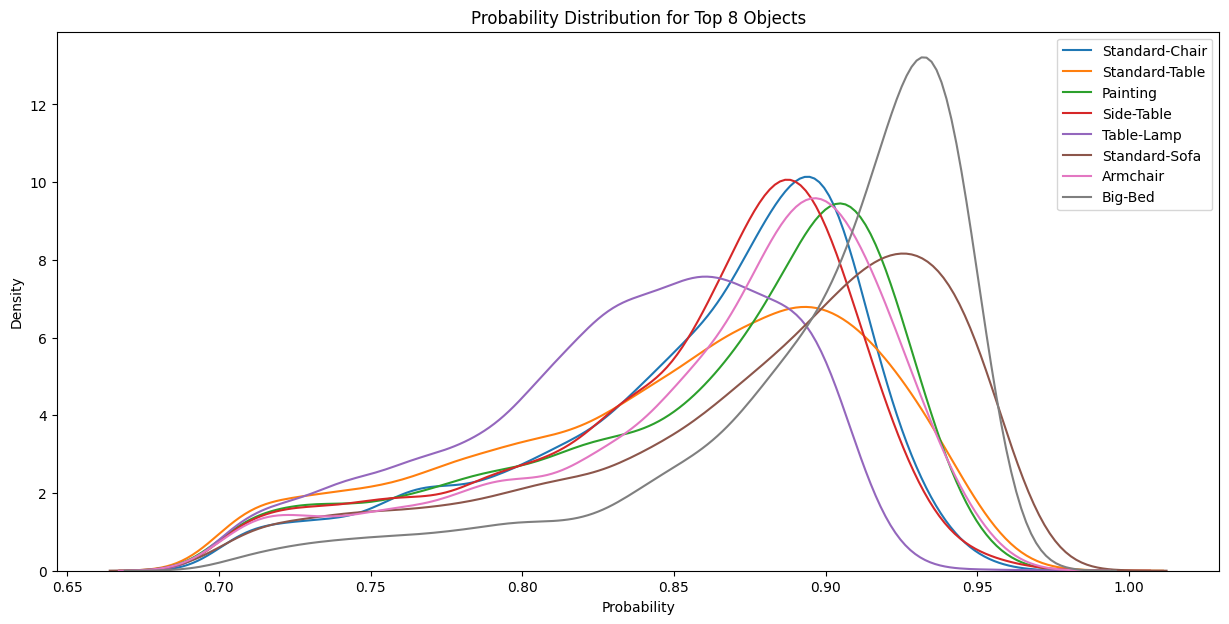

In [20]:
def plot_top_n_objects_probability_distribution(df, top_n=8):
    object_counts = Counter()
    for detected_objects in df['Detected Objects']:
        object_counts.update(detected_objects)
    
    top_objects = [obj for obj, _ in object_counts.most_common(top_n)]
    object_probabilities = {obj: [] for obj in top_objects}
    
    for detected_objects in df['Detected Objects']:
        objects = detected_objects
        for obj in top_objects:
            if obj in objects:
                object_probabilities[obj].append(objects[obj])
    
    plt.figure(figsize=(15, 7))
    for obj, probs in object_probabilities.items():
        sns.kdeplot(probs, label=obj)
    
    plt.title(f'Probability Distribution for Top {top_n} Objects')
    plt.xlabel('Probability')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
plot_top_n_objects_probability_distribution(df)

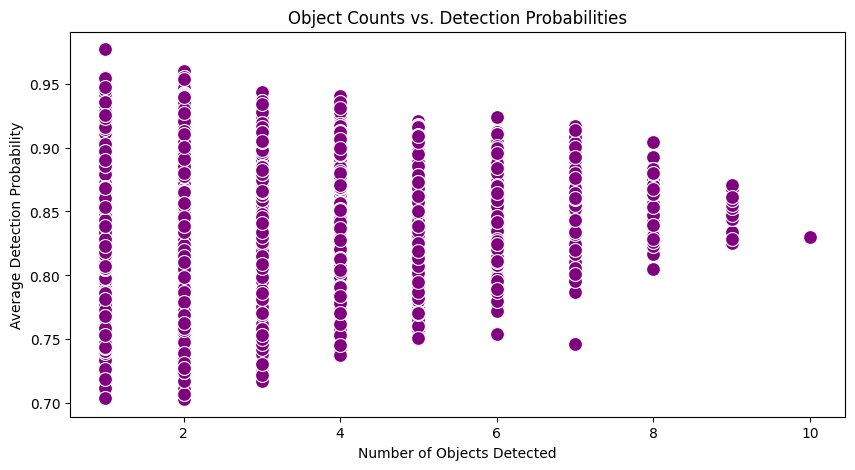

In [10]:
def plot_object_counts_vs_probabilities(df):
    object_counts = []
    avg_probabilities = []
    
    for detected_objects in df['Detected Objects']:
        objects = detected_objects
        object_counts.append(len(objects))
        avg_probabilities.append(np.mean(list(objects.values())))
    
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=object_counts, y=avg_probabilities, s=100, color='purple')
    plt.title('Object Counts vs. Detection Probabilities')
    plt.xlabel('Number of Objects Detected')
    plt.ylabel('Average Detection Probability')
    plt.show()
plot_object_counts_vs_probabilities(df)

/tmp/ipykernel_270613/1962820251.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=object_counts, y=avg_probabilities, size=sizes, sizes=(20, 200), alpha=0.6, palette="muted")


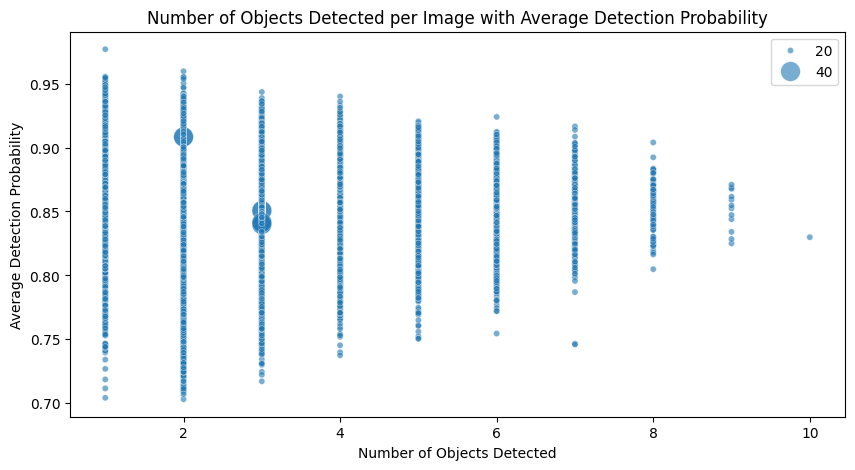

In [14]:
def plot_object_count_with_probabilities(df):
    object_counts = []
    avg_probabilities = []
    image_counts = Counter()
    
    for detected_objects in df['Detected Objects']:
        objects = detected_objects
        count = len(objects)
        avg_prob = np.mean(list(objects.values()))
        object_counts.append(count)
        avg_probabilities.append(avg_prob)
        image_counts[(count, avg_prob)] += 1
    
    plt.figure(figsize=(10, 5))
    sizes = [image_counts[(count, prob)] * 20 for count, prob in zip(object_counts, avg_probabilities)]  # Scale the size for better visibility
    sns.scatterplot(x=object_counts, y=avg_probabilities, size=sizes, sizes=(20, 200), alpha=0.6, palette="muted")
    plt.title('Number of Objects Detected per Image with Average Detection Probability')
    plt.xlabel('Number of Objects Detected')
    plt.ylabel('Average Detection Probability')
    plt.show()
plot_object_count_with_probabilities(df)

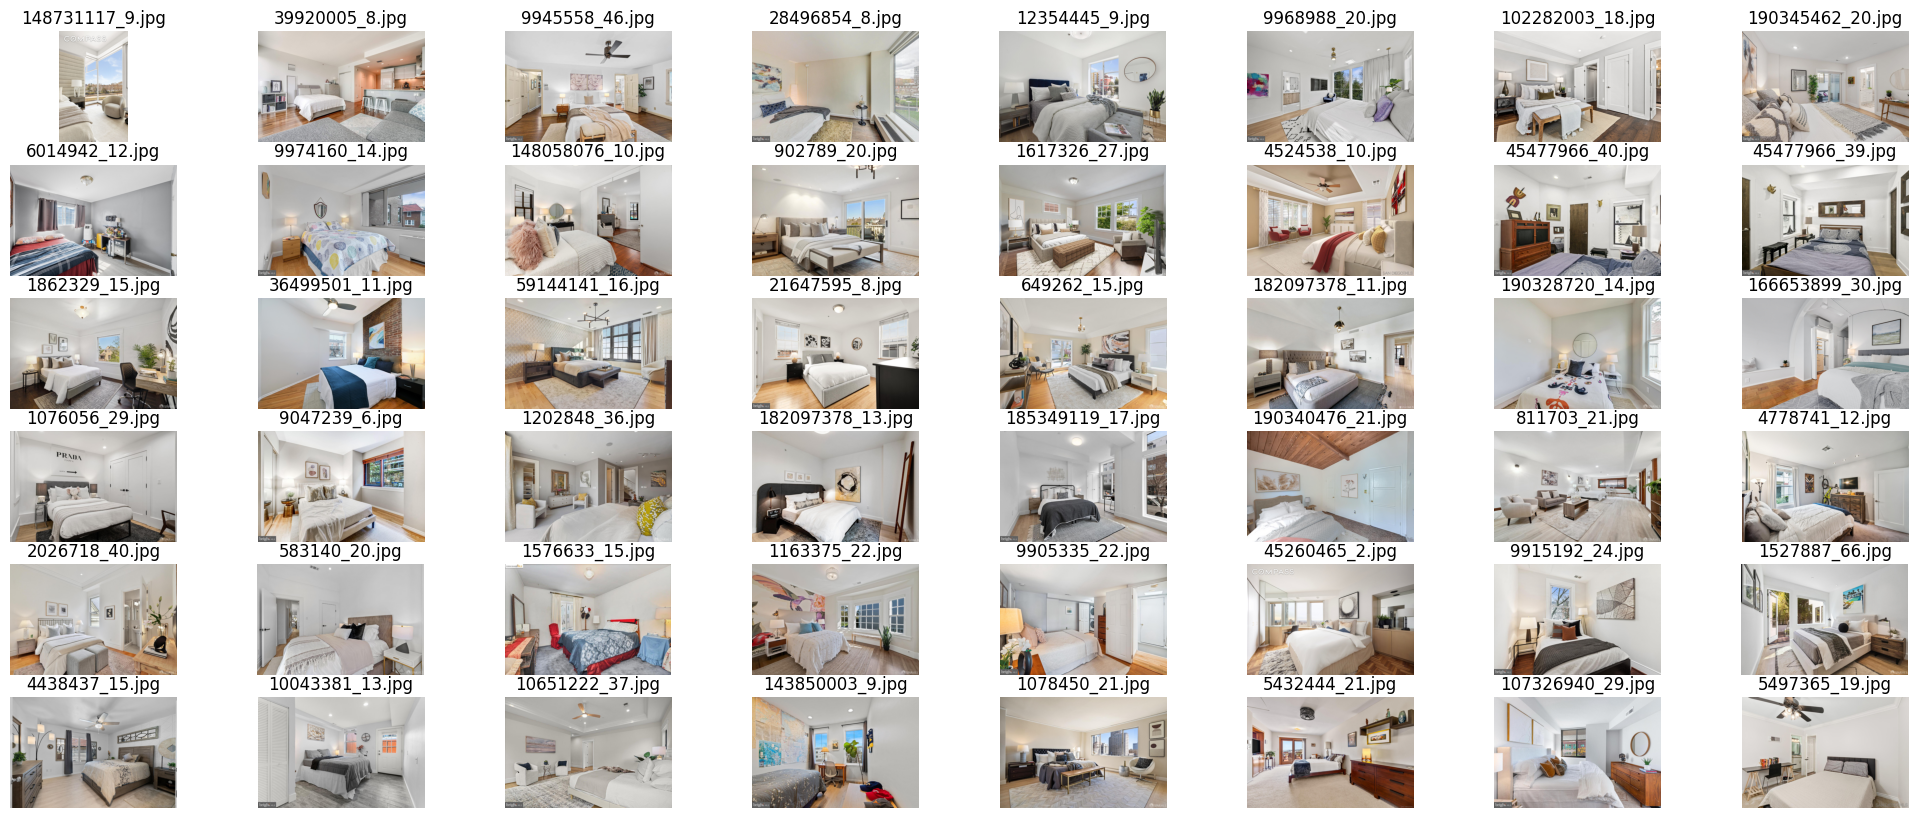

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

image_dir = 'Beds'  

def load_and_display_images(image_dir):
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')][:48]
    images = [cv2.imread(os.path.join(image_dir, img)) for img in image_files]
    plt.figure(figsize=(25, 17))
    for i, img in enumerate(images):
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(10, 8, i+1)
        plt.imshow(img_rgb)
        plt.title(image_files[i])
        plt.axis('off')
    plt.show()

load_and_display_images(image_dir)

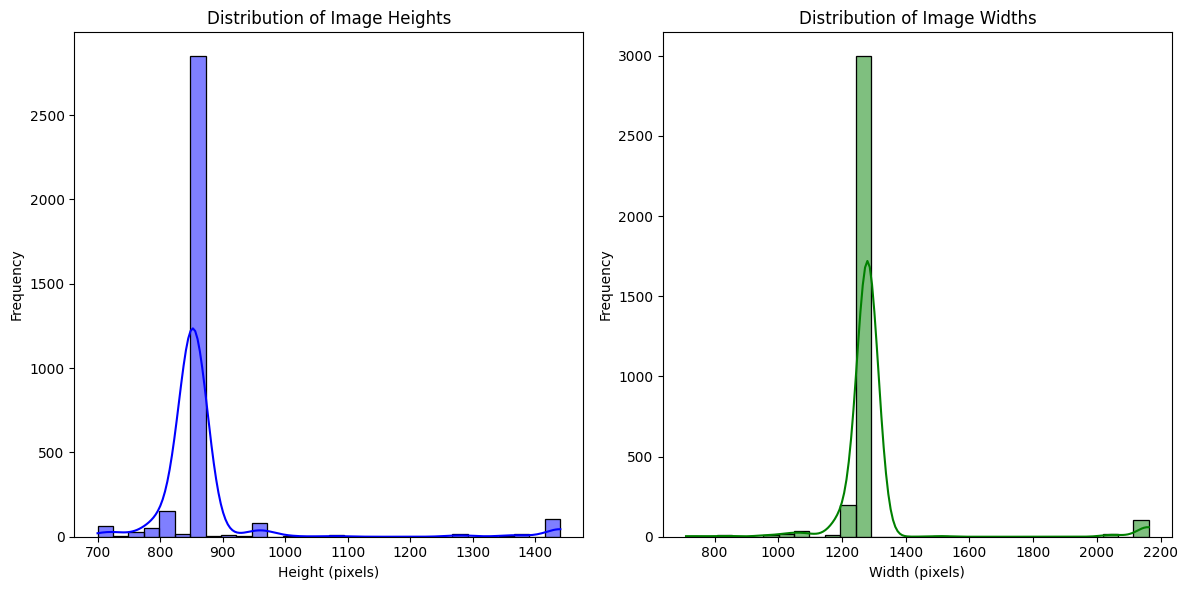

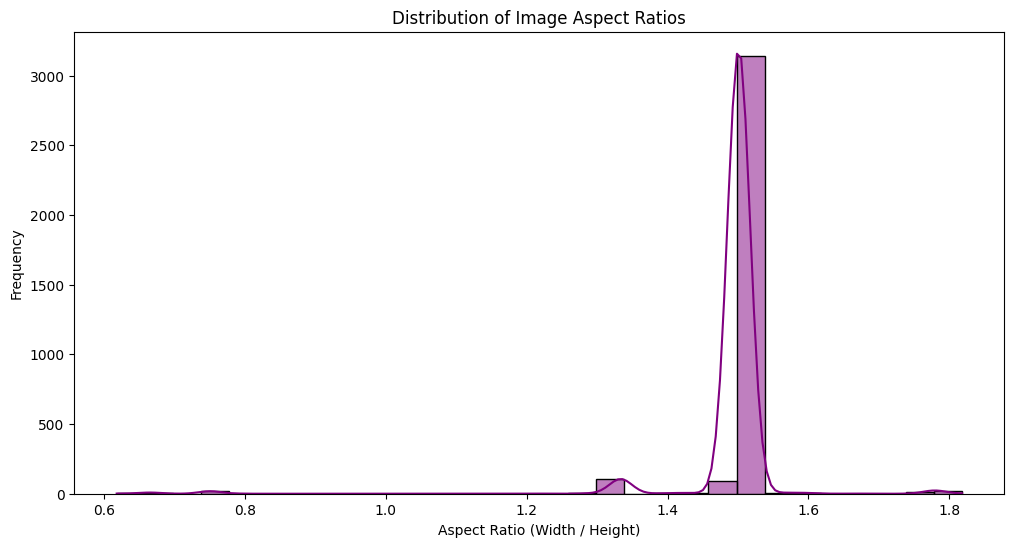

In [ ]:

def image_sizes_and_formats(image_dir):
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    data = []
    for img in image_files:
        image_path = os.path.join(image_dir, img)
        image = cv2.imread(image_path)
        height, width, channels = image.shape
        aspect_ratio = width / height
        data.append([img, height, width, channels, aspect_ratio])
    
    df = pd.DataFrame(data, columns=['Image', 'Height', 'Width', 'Channels', 'Aspect Ratio'])
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df['Height'], bins=30, kde=True, color='blue')
    plt.title('Distribution of Image Heights')
    plt.xlabel('Height (pixels)')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    sns.histplot(df['Width'], bins=30, kde=True, color='green')
    plt.title('Distribution of Image Widths')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(12, 6))
    sns.histplot(df['Aspect Ratio'], bins=30, kde=True, color='purple')
    plt.title('Distribution of Image Aspect Ratios')
    plt.xlabel('Aspect Ratio (Width / Height)')
    plt.ylabel('Frequency')
    plt.show()
    
    
    return df

df = image_sizes_and_formats(image_dir)

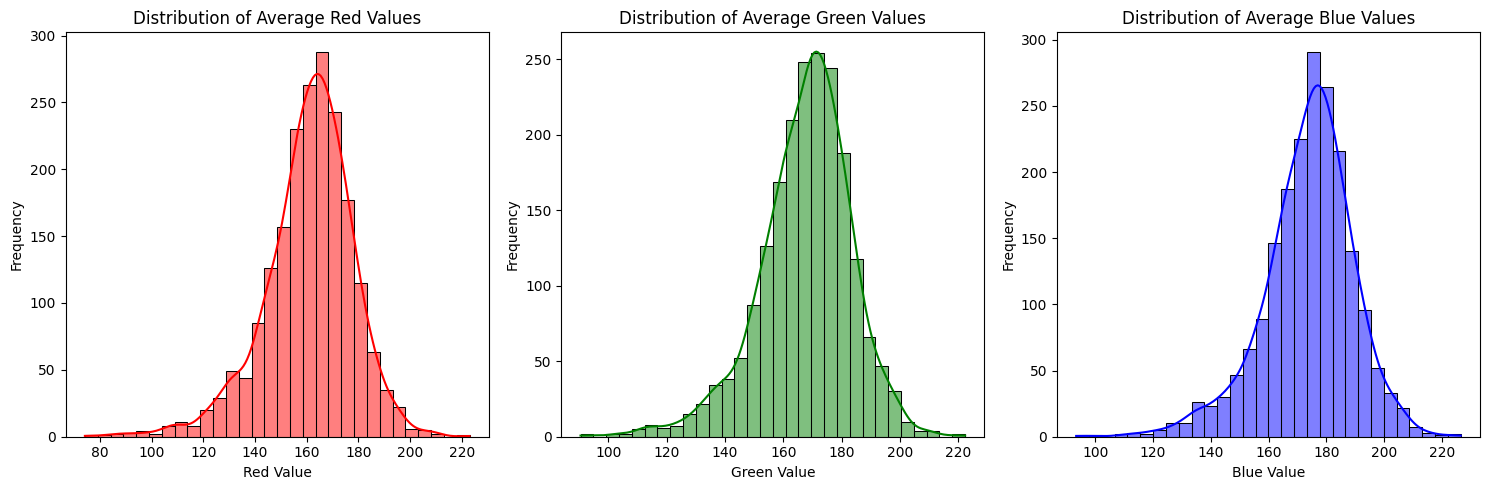

In [ ]:

def analyze_image_colors(image_dir, sample_size=2000):
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')][:sample_size]
    color_data = []
    
    for img in image_files:
        image_path = os.path.join(image_dir, img)
        image = cv2.imread(image_path)
        avg_color_per_row = np.average(image, axis=0)
        avg_color = np.average(avg_color_per_row, axis=0)
        color_data.append([img, avg_color])
    
    color_df = pd.DataFrame(color_data, columns=['Image', 'Average Color'])
    
    color_df[['R', 'G', 'B']] = pd.DataFrame(color_df['Average Color'].tolist(), index=color_df.index)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    sns.histplot(color_df['R'], bins=30, kde=True, color='red')
    plt.title('Distribution of Average Red Values')
    plt.xlabel('Red Value')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 2)
    sns.histplot(color_df['G'], bins=30, kde=True, color='green')
    plt.title('Distribution of Average Green Values')
    plt.xlabel('Green Value')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 3)
    sns.histplot(color_df['B'], bins=30, kde=True, color='blue')
    plt.title('Distribution of Average Blue Values')
    plt.xlabel('Blue Value')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
 
    
    return color_df

color_df = analyze_image_colors(image_dir)


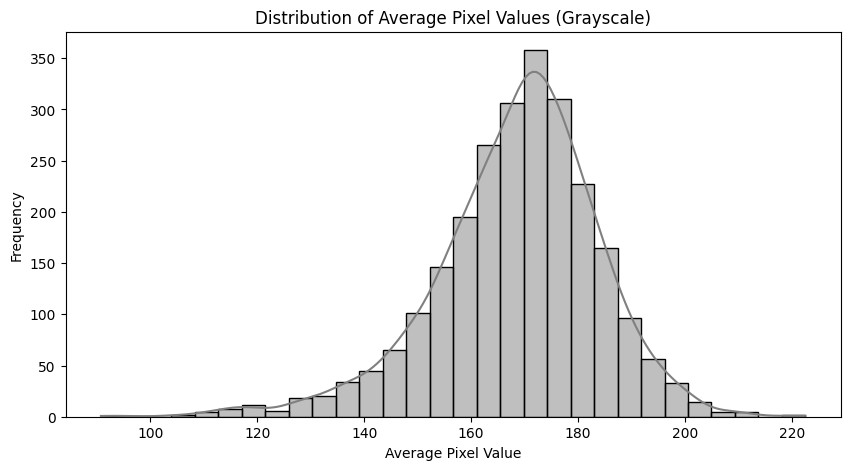

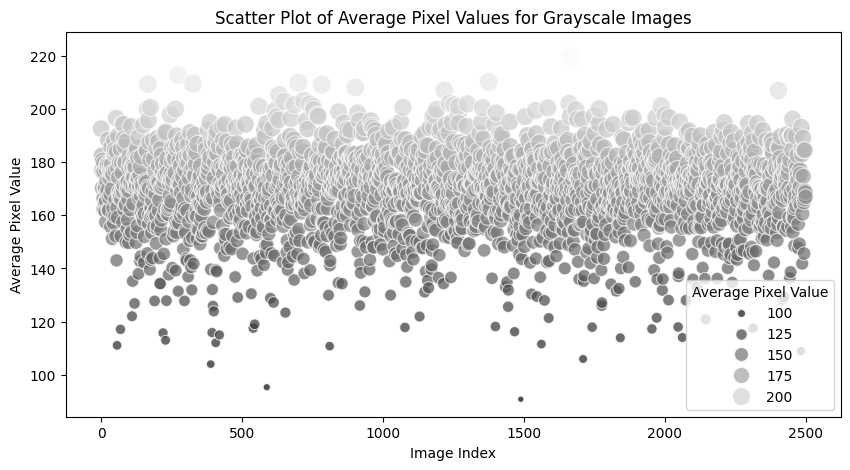

In [ ]:
def analyze_grayscale_images(image_dir, sample_size=2500):
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')][:sample_size]
    grayscale_data = []
    
    for img in image_files:
        image_path = os.path.join(image_dir, img)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        avg_pixel_value = np.mean(image)
        grayscale_data.append([img, avg_pixel_value])
    
    grayscale_df = pd.DataFrame(grayscale_data, columns=['Image', 'Average Pixel Value'])
    
    plt.figure(figsize=(10, 5))
    sns.histplot(grayscale_df['Average Pixel Value'], bins=30, kde=True, color='gray')
    plt.title('Distribution of Average Pixel Values (Grayscale)')
    plt.xlabel('Average Pixel Value')
    plt.ylabel('Frequency')
    plt.show()
    
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=range(len(grayscale_df)), y='Average Pixel Value', data=grayscale_df, hue='Average Pixel Value', palette='gray', size='Average Pixel Value', sizes=(20, 200), alpha=0.7)
    plt.title('Scatter Plot of Average Pixel Values for Grayscale Images')
    plt.xlabel('Image Index')
    plt.ylabel('Average Pixel Value')
    plt.show()
    
    return grayscale_df

grayscale_df = analyze_grayscale_images(image_dir)

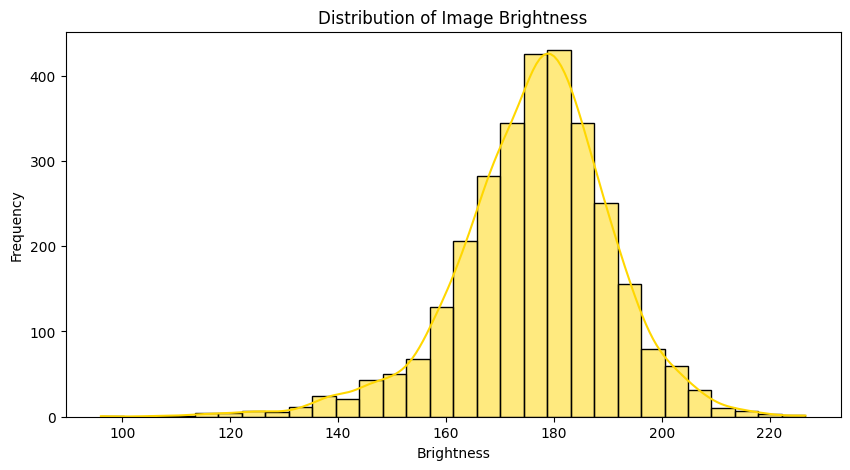

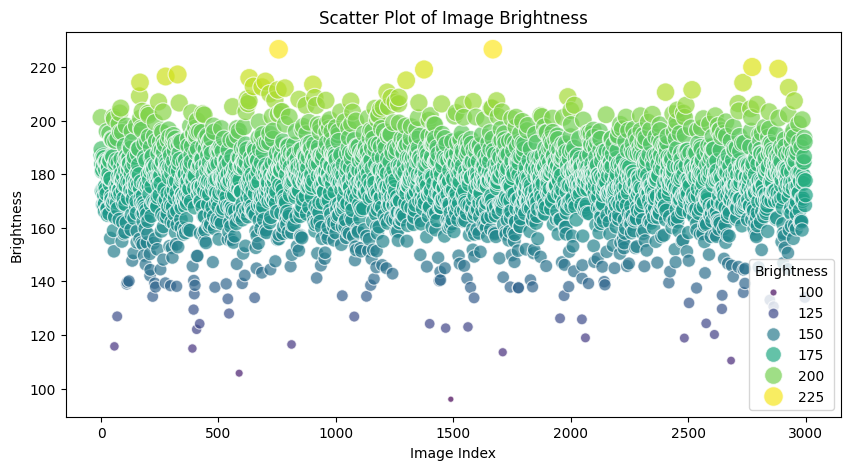

In [ ]:

def analyze_image_brightness(image_dir, sample_size=3000):
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')][:sample_size]
    brightness_data = []
    
    for img in image_files:
        image_path = os.path.join(image_dir, img)
        image = cv2.imread(image_path)
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        brightness = np.mean(hsv_image[:, :, 2])
        brightness_data.append([img, brightness])
    
    brightness_df = pd.DataFrame(brightness_data, columns=['Image', 'Brightness'])
    
    # Plot distribution of brightness values
    plt.figure(figsize=(10, 5))
    sns.histplot(brightness_df['Brightness'], bins=30, kde=True, color='gold')
    plt.title('Distribution of Image Brightness')
    plt.xlabel('Brightness')
    plt.ylabel('Frequency')
    plt.show()
    
    # Plot scatter plot of image indices vs. brightness values
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=range(len(brightness_df)), y='Brightness', data=brightness_df, hue='Brightness', palette='viridis', size='Brightness', sizes=(20, 200), alpha=0.7)
    plt.title('Scatter Plot of Image Brightness')
    plt.xlabel('Image Index')
    plt.ylabel('Brightness')
    plt.show()
    
    return brightness_df

brightness_df = analyze_image_brightness(image_dir)

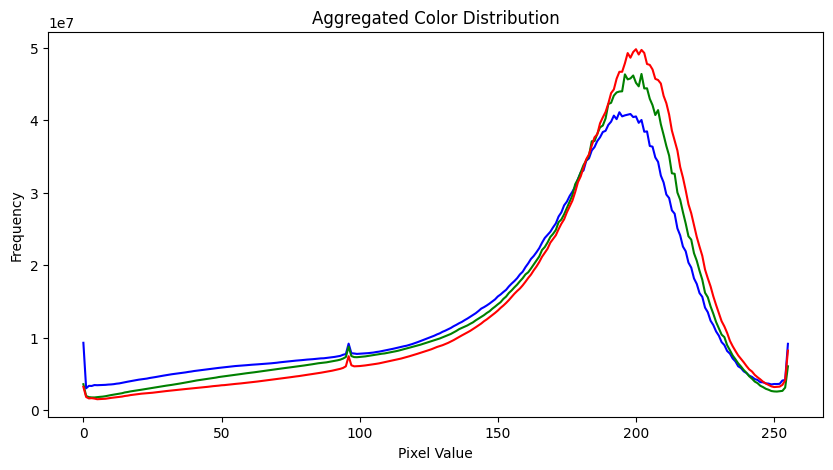

In [ ]:
def compare_color_distributions(image_dir, sample_size=3000):
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')][:sample_size]
    color_channels = {'b': np.zeros(256), 'g': np.zeros(256), 'r': np.zeros(256)}
    
    for img in image_files:
        image_path = os.path.join(image_dir, img)
        image = cv2.imread(image_path)
        for i, col in enumerate(color_channels.keys()):
            histr = cv2.calcHist([image], [i], None, [256], [0, 256])
            color_channels[col] += histr.flatten()
    
    plt.figure(figsize=(10, 5))
    for col, hist in color_channels.items():
        plt.plot(hist, color=col)
    plt.title('Aggregated Color Distribution')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

compare_color_distributions(image_dir, sample_size=3000)